In [1]:
import math
import collections
import urllib

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

%matplotlib inline

In [3]:
import getweather

In [7]:
allyears = np.vstack([getweather.getyear("PASADENA", ['TMIN','TMAX'], year)
                          for year in range(1910, 2020)])

In [13]:
tmin_normal, tmax_normal = np.nanmean(allyears['TMIN'], axis=1), np.nanmean(allyears['TMAX'], axis=1)

In [20]:
(tmin_normal + tmax_normal)/2

array([17.13436926, 15.54410959, 15.68917808, 15.70657534, 16.82      ,
       16.09821918, 15.40576286, 16.13054795, 16.41178082, 15.99374718,
       16.01246575, 16.44068493, 16.17495258, 16.62889543, 16.95069776,
       17.32728812, 17.84855452, 17.12602692, 17.52630137, 17.69065934,
       17.28671233, 18.08616438, 16.68219178, 16.50278552, 18.11027397,
       16.74945205, 17.81246575, 16.97356164, 17.42519268, 17.51634615,
       17.77184874, 16.96767123, 16.88502747, 17.40684932, 16.3       ,
       16.91136986, 17.093     , 17.52437673, 16.37643836, 16.69717514,
       17.18547945, 16.82273973, 16.65726027, 17.39986301, 17.51410959,
       16.90041096, 17.55945205, 17.98383562, 18.68130194, 19.16474719,
       18.43238636, 18.28919668, 17.51356164, 17.97232877, 17.48753425,
       17.62821918, 18.3130137 , 18.3690411 , 18.22287671, 17.90424658,
       18.19767123, 17.9330137 , 18.46328767, 18.12937215, 18.11935707,
       17.2782967 , 18.29876712, 18.40164384, 18.59134328, 18.43

In [40]:
def smooth(array, window=10, mode='valid'):
    return np.correlate(array, np.ones(window)/window, mode)# the bigger the window is, the smoother the graph will be

In [43]:
# collect data and make chart for any city and current year,
# following the same steps as above

def waplot(station):
    pp.figure(figsize=(15,4.5))
    
    allyears = np.vstack([getweather.getyear(station, ['TMIN','TMAX'], year)
                          for year in range(1910, 2020)])
    midcentury = np.vstack([getweather.getyear(station, ['TMIN','TMAX'], year)
                          for year in range(1945, 1955)])

    tmin_normal, tmax_normal = np.nanmean(allyears['TMIN'], axis=1), np.nanmean(allyears['TMAX'], axis=1)
    midtmin_normal, midtmax_normal = np.nanmean(midcentury['TMIN']), np.nanmean(midcentury['TMAX'])
    
    average = (tmin_normal + tmax_normal)/2
    midaverage = (midtmin_normal + midtmax_normal)/2
    
    anomaly = average - midaverage

    days = np.arange(1910, 2020)
    
    pp.plot(days, anomaly, label=station)
    pp.plot(days[4:-4], smooth(anomaly, 9, 'valid'), label="Smooth: " + station)#remember valid mode gets rid of the long lines in the ends of the plot

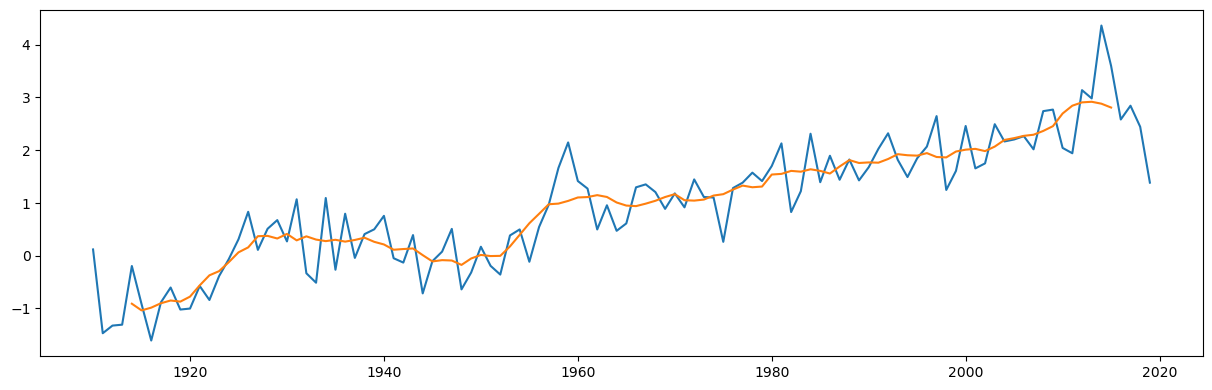

In [44]:
waplot("PASADENA")